<a href="https://colab.research.google.com/github/alphabeen/codingnote/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOAD

In [ ]:
from sklearn.datasets import load_iris

Iris = load_iris()

In [ ]:
Iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame(data=np.c_[Iris['data'], Iris['target']], columns=Iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
data['target'] = data['target'].map({0: "setosa", 1: "versicolor", 2:"virginica"})
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x_data = data.iloc[:100,0:2]
y_data = data.iloc[:100,-1]

x_data, y_data

(    sepal length (cm)  sepal width (cm)
 0                 5.1               3.5
 1                 4.9               3.0
 2                 4.7               3.2
 3                 4.6               3.1
 4                 5.0               3.6
 ..                ...               ...
 95                5.7               3.0
 96                5.7               2.9
 97                6.2               2.9
 98                5.1               2.5
 99                5.7               2.8
 
 [100 rows x 2 columns], 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 95    versicolor
 96    versicolor
 97    versicolor
 98    versicolor
 99    versicolor
 Name: target, Length: 100, dtype: object)

In [ ]:
x_data.iloc[:,0]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
     ... 
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal length (cm), Length: 100, dtype: float64

#EDA

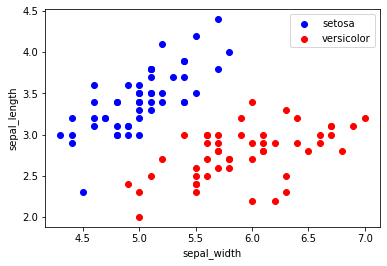

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_data.iloc[:50,0], x_data.iloc[:50,1], color='blue', label="setosa")
plt.scatter(x_data.iloc[50:,0], x_data.iloc[50:,1], color='red', label="versicolor")
plt.ylabel('sepal_length')
plt.xlabel('sepal_width')
plt.legend()
plt.show()

#SVM

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [ ]:
y_test

91    versicolor
33        setosa
46        setosa
2         setosa
3         setosa
66    versicolor
56    versicolor
87    versicolor
43        setosa
45        setosa
26        setosa
99    versicolor
30        setosa
23        setosa
17        setosa
14        setosa
89    versicolor
5         setosa
25        setosa
42        setosa
Name: target, dtype: object

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=8, gamma=0.1)

model.fit(x_train,y_train)

SVC(C=8, gamma=0.1, kernel='linear')

kernel 종류

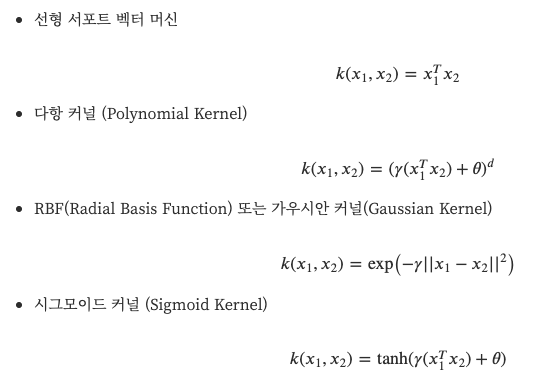

In [ ]:
pred = model.predict(x_test)

In [ ]:
x_test

,sepal length (cm),sepal width (cm)
91,6.1,3.0
33,5.5,4.2
46,5.1,3.8
2,4.7,3.2
3,4.6,3.1
66,5.6,3.0
56,6.3,3.3
87,6.3,2.3
43,5.0,3.5
45,4.8,3.0


In [ ]:
pred

array(['versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa'], dtype=object)

In [ ]:
pred, y_test

(array(['versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
        'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
        'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
        'setosa', 'setosa', 'setosa'], dtype=object), 91    versicolor
 33        setosa
 46        setosa
 2         setosa
 3         setosa
 66    versicolor
 56    versicolor
 87    versicolor
 43        setosa
 45        setosa
 26        setosa
 99    versicolor
 30        setosa
 23        setosa
 17        setosa
 14        setosa
 89    versicolor
 5         setosa
 25        setosa
 42        setosa
 Name: target, dtype: object)

In [ ]:
print("prediction accuracy: {:.2f}".format(np.mean(pred == y_test)))

prediction accuracy: 1.00
